In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download harshpatel66/mpii-human-pose

Saving kaggle.json to kaggle.json
100% 11.3G/11.3G [07:57<00:00, 25.7MB/s]
100% 11.3G/11.3G [07:57<00:00, 25.4MB/s]


In [2]:
import zipfile
# Get the path to the zip file
zip_file_path = '/content/mpii-human-pose.zip'
zip_file = zipfile.ZipFile(zip_file_path)
zip_file.extractall()

In [ ]:
import json
import os
import shutil
import random


with open('/content/mpii_annotations.json', 'r') as f:
    annotations = json.load(f)

len(annotations)

In [4]:
images_with_zero_annotations = [img for img in annotations if img['numOtherPeople'] == 0]
total_images_with_zero_annotations = len(images_with_zero_annotations)
print("Total number of images with zero annotations:", total_images_with_zero_annotations)

Total number of images with zero annotations: 11503


In [5]:
annotations_with_zero_numberhuman = []
for annotation in annotations:
    if annotation['numOtherPeople'] == 0:
        annotations_with_zero_numberhuman.append(annotation)

In [ ]:
len(annotations_with_zero_numberhuman)

11503

# **EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/mpii_human_pose.csv')

In [ ]:
df.drop(['ID','NAME','Activity', 'Category','Scale'], axis=1)

,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,l knee_X,l knee_Y,...,r elbow_X,r elbow_Y,r shoulder_X,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y
0,620,394,616,269,573,185,647,188,661,221,...,553,161,601,167,692,185,693,240,688,313
1,-1,-1,-1,-1,806,543,720,593,-1,-1,...,555,410,647,281,719,299,711,516,545,466
2,804,711,816,510,908,438,1040,454,906,528,...,798,340,902,253,1067,253,1167,353,1142,478
3,301,461,305,375,201,340,294,342,335,370,...,260,335,244,261,314,264,327,320,362,346
4,980,322,896,318,865,248,943,226,948,290,...,754,247,792,147,923,123,995,163,961,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17367,876,461,815,380,779,296,742,303,706,386,...,726,260,704,214,663,223,674,286,631,260
17368,1038,656,950,504,903,328,831,337,811,504,...,864,273,821,204,729,220,704,332,675,269
17369,562,617,558,539,553,452,511,458,529,536,...,565,393,572,377,490,378,470,411,461,414
17370,496,377,466,322,510,278,540,280,558,331,...,404,288,441,253,466,251,436,293,410,325


In [ ]:
m,n =df.shape

In [ ]:
pd.Series(df.columns)

0               ID
1             NAME
2        r ankle_X
3        r ankle_Y
4         r knee_X
5         r knee_Y
6          r hip_X
7          r hip_Y
8          l hip_X
9          l hip_Y
10        l knee_X
11        l knee_Y
12       l ankle_X
13       l ankle_Y
14        pelvis_X
15        pelvis_Y
16        thorax_X
17        thorax_Y
18    upper neck_X
19    upper neck_Y
20      head top_X
21      head top_Y
22       r wrist_X
23       r wrist_Y
24       r elbow_X
25       r elbow_Y
26    r shoulder_X
27    r shoulder_Y
28    l shoulder_X
29    l shoulder_Y
30       l elbow_X
31       l elbow_Y
32       l wrist_X
33       l wrist_Y
34           Scale
35        Activity
36        Category
dtype: object

<ipython-input-11-64cb4a0f95d6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


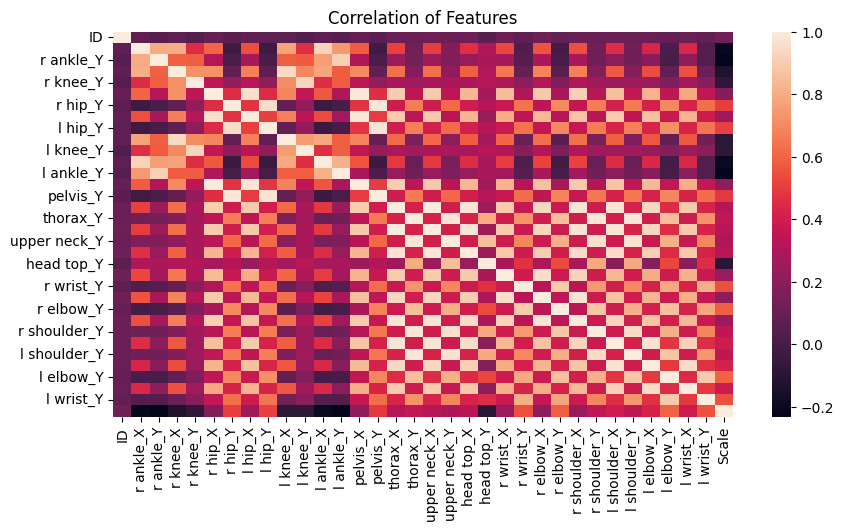

In [ ]:
import seaborn as sns
plt.figure(figsize =(10,5))
sns.heatmap(df.corr())
plt.title("Correlation of Features")
plt.show()

# **Check the image size**

In [ ]:
annotations_with_zero_numberhuman[0]

{'dataset': 'MPI',
 'isValidation': 0.0,
 'img_paths': '060111501.jpg',
 'img_width': 1280.0,
 'img_height': 720.0,
 'objpos': [897.0, 171.0],
 'joint_self': [[980.0, 322.0, 1.0],
  [896.0, 318.0, 0.0],
  [865.0, 248.0, 1.0],
  [943.0, 226.0, 1.0],
  [948.0, 290.0, 1.0],
  [881.0, 349.0, 1.0],
  [904.0, 237.0, 1.0],
  [858.0, 135.0, 1.0],
  [871.188, 180.424, 1.0],
  [835.812, 58.576, 1.0],
  [772.0, 294.0, 1.0],
  [754.0, 247.0, 1.0],
  [792.0, 147.0, 1.0],
  [923.0, 123.0, 1.0],
  [995.0, 163.0, 0.0],
  [961.0, 223.0, 0.0]],
 'scale_provided': 3.806,
 'joint_others': {'_ArrayType_': 'double',
  '_ArraySize_': [0, 0],
  '_ArrayData_': None},
 'scale_provided_other': {'_ArrayType_': 'double',
  '_ArraySize_': [0, 0],
  '_ArrayData_': None},
 'objpos_other': {'_ArrayType_': 'double',
  '_ArraySize_': [0, 0],
  '_ArrayData_': None},
 'annolist_index': 9.0,
 'people_index': 1.0,
 'numOtherPeople': 0.0}

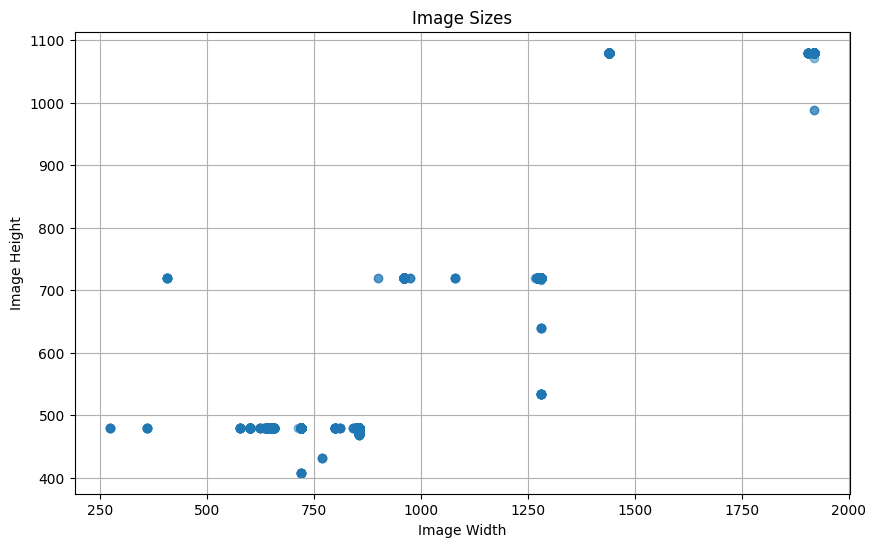

In [ ]:
import matplotlib.pyplot as plt
img_paths = []
img_widths = []
img_heights = []


for item in annotations_with_zero_numberhuman:
    img_paths.append("/content/mpii_human_pose_v1/images" +item['img_paths'])
    img_widths.append(item['img_width'])
    img_heights.append(item['img_height'])


plt.figure(figsize=(10, 6))
plt.scatter(img_widths, img_heights, alpha=0.5)
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.title('Image Sizes')
plt.grid(True)
plt.show()

In [ ]:
import shutil

#Inorder to save computational time if exists
directory_path = "/content/resized_images"

try:
    shutil.rmtree(directory_path)
    print(f"Directory '{directory_path}' and its contents have been deleted.")
except OSError as e:
    print(f"Error: {e}")


Error: [Errno 2] No such file or directory: '/content/resized_images'


In [ ]:
import cv2
import os
import json

# Function to preprocess the dataset and save the resized images
def preprocess_dataset(annotations, target_size, save_directory):
    # Create the directory if it doesn't exist
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    normalized_keypoints_list = []

    for annotation in annotations_with_zero_numberhuman:
        img_path = "/content/mpii_human_pose_v1/images/" + annotation['img_paths']
        img_width = annotation['img_width']
        img_height = annotation['img_height']
        keypoints = annotation['joint_self']

        # Read and resize the image
        image = cv2.imread(img_path)
        resized_image = cv2.resize(image, target_size)

        # Normalize keypoints
        def normalize_keypoints(keypoints, image_width, image_height):
            normalized_keypoints = []
            for keypoint in keypoints:
                x, y, visibility = keypoint
                if x == 0:
                    x_norm = 2
                else:
                    x_norm = x / image_width
                if y == 0:
                    y_norm = 2
                else:
                    y_norm = y / image_height

                visibility = int(visibility)
                normalized_keypoints.append({
                    'x': x_norm,
                    'y': y_norm
                })
            return normalized_keypoints

        normalized_keypoints = normalize_keypoints(keypoints, img_width, img_height)

        # Save the resized image to the directory
        save_path = os.path.join(save_directory,annotation['img_paths'] )
        cv2.imwrite(save_path, resized_image)

        # Append the normalized keypoints and image path
        keypoints_info = {
            'image_path': annotation['img_paths'],
            'keypoints': normalized_keypoints
        }
        normalized_keypoints_list.append(keypoints_info)

    return normalized_keypoints_list

target_size = (250, 250)

save_directory = '/content/resized_images'

# Preprocess the dataset
normalized_keypoints_list = preprocess_dataset(annotations, target_size, save_directory)

# Save the list of normalized keypoints as a JSON file
output_json_path = '/content/normalized_keypoints.json'
with open(output_json_path, 'w') as f:
    json.dump(normalized_keypoints_list, f)

print("Normalized keypoints, image paths, and visibility values have been saved in the JSON file:", output_json_path)


Normalized keypoints, image paths, and visibility values have been saved in the JSON file: /content/normalized_keypoints.json


In [ ]:
normalized_keypoints_list[100]
data = normalized_keypoints_list[500]

In [ ]:
data

{'image_path': '009148684.jpg',
 'keypoints': [{'x': 2, 'y': 2},
  {'x': 0.43042452830188677, 'y': 0.99375},
  {'x': 0.3915094339622642, 'y': 0.7208333333333333},
  {'x': 0.5094339622641509, 'y': 0.71875},
  {'x': 0.5, 'y': 0.99375},
  {'x': 2, 'y': 2},
  {'x': 0.45047169811320753, 'y': 0.7208333333333333},
  {'x': 0.4492924528301887, 'y': 0.3875},
  {'x': 0.44693396226415094, 'y': 0.375},
  {'x': 0.4257075471698113, 'y': 0.16458333333333333},
  {'x': 0.17806603773584906, 'y': 0.7666666666666667},
  {'x': 0.28773584905660377, 'y': 0.5875},
  {'x': 0.3738207547169811, 'y': 0.4},
  {'x': 0.5247641509433962, 'y': 0.375},
  {'x': 0.6155660377358491, 'y': 0.575},
  {'x': 0.7169811320754716, 'y': 0.76875}]}

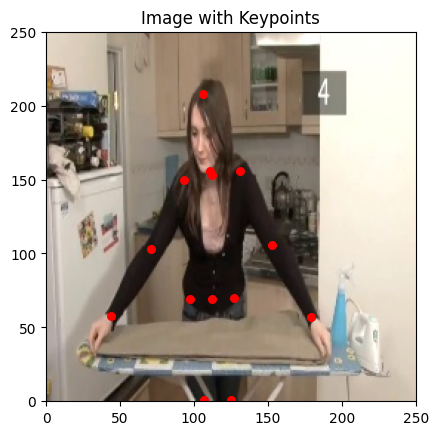

In [ ]:
import cv2
import matplotlib.pyplot as plt


image_path = "/content/resized_images/" + data['image_path']

image = cv2.imread(image_path)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()


ax.imshow(image_rgb, extent=[0, image.shape[1], 0, image.shape[0]], origin='upper')

# Plot the visible keypoints as red dots
for keypoint in data["keypoints"]:
    x, y = keypoint["x"], keypoint["y"]


    if x != 2 and y != 2:

        x_pixel = int(x * image.shape[1])
        y_pixel = int((1 - y) * image.shape[0])
        ax.scatter(x_pixel, y_pixel, color='red', s=30)

plt.title("Image with Keypoints")

# Show the plot
plt.show()


In [ ]:
normalized_keypoints_list[20]

{'image_path': '044015249.jpg',
 'keypoints': [{'x': 2, 'y': 2},
  {'x': 2, 'y': 2},
  {'x': 2, 'y': 2},
  {'x': 2, 'y': 2},
  {'x': 2, 'y': 2},
  {'x': 2, 'y': 2},
  {'x': 2, 'y': 2},
  {'x': 0.23055555555555557, 'y': 0.6354166666666666},
  {'x': 0.2507569444444444, 'y': 0.550425},
  {'x': 0.32424305555555555, 'y': 0.2412416666666667},
  {'x': 2, 'y': 2},
  {'x': 2, 'y': 2},
  {'x': 0.16111111111111112, 'y': 0.66875},
  {'x': 0.2986111111111111, 'y': 0.6},
  {'x': 0.4097222222222222, 'y': 0.625},
  {'x': 0.5361111111111111, 'y': 0.6291666666666667}]}

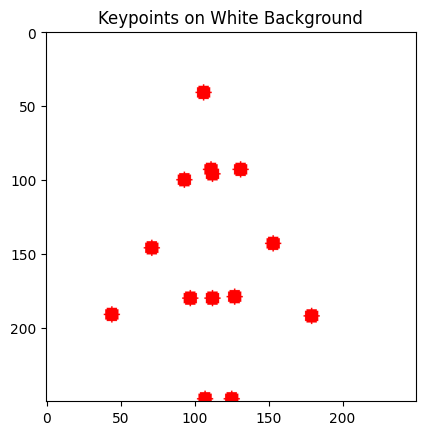

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image_path = "/content/resized_images/" + data['image_path']

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


img_height, img_width, _ = image.shape


background = np.ones((250, 250, 3), dtype=np.uint8) * 255


x_scale = 250 / img_width
y_scale = 250 / img_height


for keypoint in data["keypoints"]:
    x, y = keypoint["x"], keypoint["y"]


    x_pixel = int(x * img_width * x_scale)
    y_pixel = int(y * img_height * y_scale)
    cv2.circle(background, (x_pixel, y_pixel), 5, (0, 0, 255), -1)  # Plot visible keypoints as red circles

# Convert the white background from BGR to RGB
background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

# Display the keypoints on the white background
plt.imshow(background_rgb)
plt.title("Keypoints on White Background")
plt.show()


# **Convert image to numarray**

In [ ]:
import numpy as np
def process_entry(image_path, keypoints):
    # Load the image using OpenCV or PIL

    image = cv2.imread("/content/resized_images/"+image_path)
    image_array = np.array(image)
    return image_array, keypoints

In [ ]:
new_dataset = []

for entry in normalized_keypoints_list:
    image_path, keypoints = entry['image_path'], entry['keypoints']
    image_array, new_keypoints = process_entry(image_path, keypoints)

    new_entry = {
        'image_array': image_array,
        'keypoints': new_keypoints
    }

    new_dataset.append(new_entry)
len(new_dataset)

11503

In [ ]:
new_dataset[0]

{'image_array': array([[[156, 134, 129],
         [149, 127, 121],
         [147, 128, 121],
         ...,
         [ 19,  16,  12],
         [ 22,  18,  17],
         [ 20,  16,  15]],
 
        [[153, 129, 129],
         [145, 124, 122],
         [146, 126, 121],
         ...,
         [ 18,  17,  13],
         [ 18,  16,  15],
         [ 24,  22,  21]],
 
        [[128, 105, 110],
         [124, 101, 105],
         [125, 102, 106],
         ...,
         [ 14,  18,  12],
         [ 12,  16,  11],
         [ 21,  25,  20]],
 
        ...,
 
        [[159, 155, 154],
         [160, 156, 155],
         [162, 158, 157],
         ...,
         [167, 162, 161],
         [165, 160, 157],
         [165, 160, 157]],
 
        [[163, 159, 158],
         [162, 158, 157],
         [162, 158, 157],
         ...,
         [167, 162, 161],
         [167, 162, 159],
         [167, 162, 159]],
 
        [[163, 159, 158],
         [162, 158, 157],
         [162, 158, 157],
         ...,
         [167

# **SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(new_dataset, test_size=0.2, random_state=42)

print(f"Number of training samples: {len(train_data)}")

print(f"Number of testing samples: {len(test_data)}")


Number of training samples: 9202
Number of testing samples: 2301


In [ ]:
# test_data[20]

In [ ]:
# val_data[10]

In [ ]:
import numpy as np

train_X = []  # List to store training input features (images)
train_keypoint_Y = []  # List to store training target labels (keypoints)

# Process the dataset entries
for entry in train_data:
    image_array = entry['image_array']
    keypoints = entry['keypoints']

    # Normalize image array to the range [0, 1]
    normalized_image = image_array.astype('float32') / 255.0

    train_X.append(normalized_image)
    keypoints_values = []
    for kp in keypoints:
        keypoints_values.extend([kp['x'], kp['y']])

    # Convert the list of keypoints to a 1D array and append for each image
    train_keypoint_Y.append(np.array(keypoints_values))

# Convert the lists to numpy arrays
train_X = np.array(train_X)
train_keypoint_Y = np.array(train_keypoint_Y)

# Print the shapes of the arrays
print("Train X shape:", train_X.shape)
print("Train keypoint_X shape:", train_keypoint_Y.shape)


Train X shape: (9202, 250, 250, 3)
Train keypoint_X shape: (9202, 32)


In [ ]:
train_X[50]

array([[[0.8627451 , 0.8392157 , 0.81960785],
        [0.8745098 , 0.8509804 , 0.83137256],
        [0.8784314 , 0.85490197, 0.8352941 ],
        ...,
        [0.3764706 , 0.43137255, 0.57254905],
        [0.3647059 , 0.43137255, 0.56078434],
        [0.34509805, 0.41568628, 0.5372549 ]],

       [[0.8666667 , 0.84313726, 0.8235294 ],
        [0.8745098 , 0.8509804 , 0.83137256],
        [0.8745098 , 0.8509804 , 0.83137256],
        ...,
        [0.38431373, 0.4392157 , 0.5803922 ],
        [0.37254903, 0.44313726, 0.5647059 ],
        [0.3529412 , 0.42352942, 0.54509807]],

       [[0.8745098 , 0.8509804 , 0.83137256],
        [0.8745098 , 0.8509804 , 0.83137256],
        [0.8745098 , 0.8509804 , 0.83137256],
        ...,
        [0.3882353 , 0.45490196, 0.58431375],
        [0.38039216, 0.4509804 , 0.57254905],
        [0.36078432, 0.43137255, 0.54509807]],

       ...,

       [[0.7137255 , 0.8235294 , 0.8666667 ],
        [0.69411767, 0.8039216 , 0.84705883],
        [0.6862745 , 0

In [ ]:
train_keypoint_Y[400]

array([2.        , 2.        , 0.61328125, 0.02916667, 0.57421875,
       0.14166667, 0.63515625, 0.175     , 0.7375    , 0.21666667,
       0.73125   , 0.02361111, 0.6046875 , 0.15833333, 0.5765625 ,
       0.40416667, 0.56695469, 0.43453333, 0.52288906, 0.5738    ,
       0.69375   , 0.50555556, 0.7       , 0.37638889, 0.62421875,
       0.42638889, 0.528125  , 0.38194444, 0.5609375 , 0.19722222,
       0.5640625 , 0.37638889])

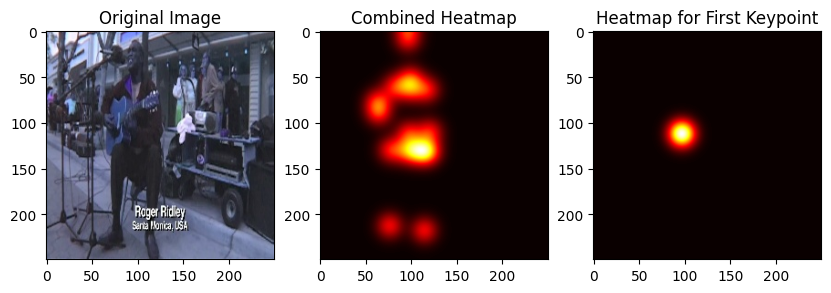

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

image = train_X[200]
image_height, image_width = 250, 250  # The reshaped image size
num_keypoints = train_keypoint_Y.shape[1] // 2

heatmaps = []
for i in range(num_keypoints):
    x_normalized, y_normalized = train_keypoint_Y[200][i * 2], train_keypoint_Y[200][i * 2 + 1]
    x = int(x_normalized * image_width)
    y = int(y_normalized * image_height)

    x = max(0, min(x, image_width - 1))
    y = max(0, min(y, image_height - 1))

    heatmap = np.zeros((image_height, image_width))
    heatmap[y, x] = 1
    heatmap = gaussian_filter(heatmap, sigma=10)

    heatmaps.append(heatmap)

#single array
final_heatmap = np.stack(heatmaps, axis=-1)

# Plot original image and heatmaps
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(final_heatmap.sum(axis=-1), cmap='hot')
plt.title('Combined Heatmap')

# Create heatmap for the first keypoint only
heatmap = np.zeros((image_height, image_width))
heatmap[y, x] = 1
heatmap = gaussian_filter(heatmap, sigma=10)

plt.subplot(133)
plt.imshow(heatmap, cmap='hot')
plt.title('Heatmap for First Keypoint')
plt.show()


In [ ]:
import numpy as np

test_X = []  # List to store training input features (images)
test_keypoint_Y = []  # List to store training target labels (keypoints)

# Process the dataset entries
for entry in test_data:
    image_array = entry['image_array']
    keypoints = entry['keypoints']

    # Normalize image array to the range [0, 1]
    normalized_image = image_array.astype('float32') / 255.0

    test_X.append(normalized_image)
    keypoints_values = []
    for kp in keypoints:
        keypoints_values.extend([kp['x'], kp['y']])

    # Convert the list of keypoints to a 1D array and append for each image
    test_keypoint_Y.append(np.array(keypoints_values))

# Convert the lists to numpy arrays
test_X = np.array(test_X)
test_keypoint_Y = np.array(test_keypoint_Y)

# Print the shapes of the arrays
print("Train X shape:", test_X.shape)
print("Train keypoint_X shape:", test_keypoint_Y.shape)


Train X shape: (2301, 250, 250, 3)
Train keypoint_X shape: (2301, 32)


In [ ]:
# import numpy as np

# val_X = []  # List to store training input features (images)
# val_keypoint_X = []  # List to store training target labels (keypoints)

# # Process the dataset entries
# for entry in val_data:
#     image_array = entry['image_array']
#     keypoints = entry['keypoints']

#     # Normalize image array to the range [0, 1]
#     normalized_image = image_array.astype('float32') / 255.0

#     val_X.append(normalized_image)
#     keypoints_values = []
#     for kp in keypoints:
#         keypoints_values.append([kp['x'], kp['y'], kp['visibility']])
#     val_keypoint_X.append(keypoints_values)

# # Convert the lists to numpy arrays
# val_X = np.array(val_X)
# val_keypoint_X = np.array(val_keypoint_X)

# # Print the shapes of the arrays
# print("Train X shape:", val_X.shape)
# print("Train keypoint_X shape:", val_keypoint_X.shape)



In [ ]:
# import numpy as np

# test_Y_array = []
# for keypoints_list in test_Y:
#     keypoints_array = []
#     for kp in keypoints_list:
#         keypoints_array.extend([kp['x'], kp['y'], kp['visibility']])
#     test_Y_array.append(keypoints_array)

# # Convert train_Y_array to a numpy array
# test_Y_array = np.array(test_Y_array)

# print("Train Y Array Shape:", test_Y_array.shape)


In [ ]:
import tensorflow as tf

# **mAP metrics**

In [ ]:
class MeanAveragePrecision(tf.keras.metrics.Metric):
    def __init__(self, num_thresholds=11, name='mAP', **kwargs):
        super(MeanAveragePrecision, self).__init__(name=name, **kwargs)
        self.num_thresholds = num_thresholds
        self.precision_metrics = [tf.keras.metrics.Precision(thresholds=i/num_thresholds) for i in range(num_thresholds)]
        self.recall_metrics = [tf.keras.metrics.Recall(thresholds=i/num_thresholds) for i in range(num_thresholds)]

    def update_state(self, y_true, y_pred, sample_weight=0.5):
        # Handle hidden keypoints with a value of 2
        mask = tf.math.not_equal(y_true, 2)
        y_true_masked = tf.where(mask, y_true, 0)
        y_pred_masked = tf.where(mask, y_pred, 0)

        for i in range(self.num_thresholds):
            self.precision_metrics[i].update_state(y_true_masked, y_pred_masked)
            self.recall_metrics[i].update_state(y_true_masked, y_pred_masked)

    def result(self):
        average_precisions = []
        for i in range(self.num_thresholds):
            precision = self.precision_metrics[i].result()
            recall = self.recall_metrics[i].result()
            ap = precision * recall
            average_precisions.append(ap)
        return tf.reduce_mean(average_precisions)

    def reset_states(self):
        for i in range(self.num_thresholds):
            self.precision_metrics[i].reset_states()
            self.recall_metrics[i].reset_states()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# **VGG19**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

def build_vgg19(input_shape, num_keypoints):
    input_layer = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    # # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    # # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    # # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_keypoints , activation='linear')(x)  # 16 keypoints * 3 values each

    model = Model(inputs=input_layer, outputs=output)
    return model


In [ ]:
model = build_vgg19((250,250,3),32)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 125, 125, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 125, 125, 64)      0     

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

input_shape = (250, 250, 3)
num_keypoints = 32  # Number of keypoints
epochs = 20  # Number of epochs

def learning_rate_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Build the CNN model using the build_vgg19 function
modelVGG = build_vgg19(input_shape, num_keypoints)

# Compile the model using BinaryCrossentropy loss
modelVGG.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAveragePrecision()])

# Train the model

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

history = modelVGG.fit(train_X, train_keypoint_Y, batch_size=10, epochs=5,
           validation_split=0.2, callbacks=[lr_scheduler])

# Plot loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

Epoch 1/5
737/737 [==============================] - ETA: 0s - loss: 2.0656 - mAP: 0.5285

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric MeanAveragePrecision implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


737/737 [==============================] - 112s 121ms/step - loss: 2.0656 - mAP: 0.5285 - val_loss: 1.1388 - val_mAP: 0.5715 - lr: 0.0010
Epoch 2/5
736/737 [============================>.] - ETA: 0s - loss: 0.9317 - mAP: 0.5496

In [ ]:
# import numpy as np
# from keras.metrics import MeanAbsoluteError

# # Assuming your test_X[0] and test_keypoint_Y[0] have shapes (250, 250, 3) and (32,) respectively
# single_image = test_X[100]
# single_keypoints = test_keypoint_Y[100]

# # Reshape the single image and single keypoints to include a batch dimension
# single_image_batch = single_image[np.newaxis, ...]
# single_keypoints_batch = single_keypoints[np.newaxis, ...]

# # Predict keypoints for the single image
# predicted_keypoints = model.predict(single_image_batch)
# print(predicted_keypoints)

# # Calculate Mean Absolute Error
# mae = MeanAbsoluteError()(single_keypoints_batch, predicted_keypoints).numpy()

# # Print the MAE
# print(f"Mean Absolute Error: {mae:.4f}")


# **VGG19 Base**

In [ ]:

def base_vgg19(input_shape, num_keypoints):
    model = tf.keras.Sequential()


    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))


    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))


    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))


    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))


    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_keypoints , activation='linear'))
    return model


In [ ]:
def learning_rate_schedule(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * np.exp(-0.1)

Epoch 1/20
415/415 [==============================] - ETA: 0s - loss: 1.4792 - mAP: 0.5519

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric MeanAveragePrecision implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


415/415 [==============================] - 38s 64ms/step - loss: 1.4792 - mAP: 0.5519 - val_loss: 0.1425 - val_mAP: 0.5291 - lr: 0.0010
Epoch 2/20
415/415 [==============================] - 25s 59ms/step - loss: 0.1506 - mAP: 0.5994 - val_loss: 0.1341 - val_mAP: 0.5871 - lr: 0.0010
Epoch 3/20
415/415 [==============================] - 25s 59ms/step - loss: 0.1477 - mAP: 0.6022 - val_loss: 0.1330 - val_mAP: 0.6296 - lr: 0.0010
Epoch 4/20
415/415 [==============================] - 25s 59ms/step - loss: 0.1471 - mAP: 0.6044 - val_loss: 0.1345 - val_mAP: 0.5835 - lr: 0.0010
Epoch 5/20
415/415 [==============================] - 25s 59ms/step - loss: 0.1467 - mAP: 0.6054 - val_loss: 0.1329 - val_mAP: 0.5914 - lr: 0.0010
Epoch 6/20
415/415 [==============================] - 24s 59ms/step - loss: 0.1462 - mAP: 0.6057 - val_loss: 0.1331 - val_mAP: 0.6067 - lr: 0.0010
Epoch 7/20
415/415 [==============================] - 25s 59ms/step - loss: 0.1452 - mAP: 0.6066 - val_loss: 0.1340 - val_mAP: 0.

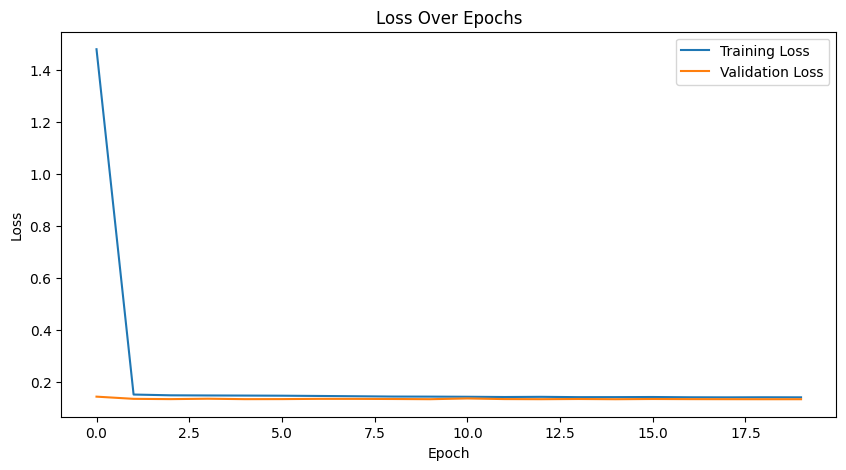

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
input_shape = (250, 250, 3)
num_keypoints = 32  # Number of keypoints


# Build the CNN model using the build_vgg19 function
model_V = base_vgg19(input_shape, num_keypoints)

# Compile the model using BinaryCrossentropy loss
model_V.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAveragePrecision()])
lr_scheduler = LearningRateScheduler(learning_rate_schedule)
# Train the model
history = model_V.fit(train_X, train_keypoint_Y, batch_size=20, epochs=20,
           validation_split=0.1, callbacks=[lr_scheduler])

# Plot loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
mAP_metric = MeanAveragePrecision(num_thresholds=11)

for i in range(len(test_X)):
    true_keypoints = test_keypoint_Y[i]
    test_sample = np.expand_dims(test_X[i], axis=0)
    predicted_keypoints = model_V.predict(test_sample)
    predicted_keypoints_reshaped = np.reshape(predicted_keypoints, true_keypoints.shape)
    mAP_metric.update_state(true_keypoints, predicted_keypoints_reshaped)


mean_ap = mAP_metric.result().numpy()
print("Mean Average Precision:", mean_ap)

1/1 [==============================] - 0s 22ms/step
Mean Average Precision: 0.6022114


In [ ]:
model_V.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 250, 250, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 250, 250, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 125, 125, 64)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                    

# **RESNET 50**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

def build_resnet50_keypoint_model(input_shape, num_keypoints):

    backbone = ResNet50(include_top=False, weights='imagenet', input_tensor=Input(shape=input_shape))

    for layer in backbone.layers:
        layer.trainable = False


    x = backbone.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    output = Dense(num_keypoints, activation='linear')(x)

    model = Model(inputs=backbone.input, outputs=output)
    return model

Epoch 1/30
737/737 [==============================] - 23s 22ms/step - loss: 0.1644 - mAP: 0.5865 - val_loss: 0.4375 - val_mAP: 0.3856 - lr: 0.0010
Epoch 2/30
737/737 [==============================] - 13s 17ms/step - loss: 0.1352 - mAP: 0.5910 - val_loss: 0.1783 - val_mAP: 0.4600 - lr: 0.0010
Epoch 3/30
737/737 [==============================] - 13s 18ms/step - loss: 0.1294 - mAP: 0.5899 - val_loss: 0.3668 - val_mAP: 0.4071 - lr: 0.0010
Epoch 4/30
737/737 [==============================] - 13s 18ms/step - loss: 0.1241 - mAP: 0.5907 - val_loss: 0.2183 - val_mAP: 0.4047 - lr: 0.0010
Epoch 5/30
737/737 [==============================] - 13s 18ms/step - loss: 0.1197 - mAP: 0.5898 - val_loss: 0.7539 - val_mAP: 0.2127 - lr: 0.0010
Epoch 6/30
737/737 [==============================] - 13s 18ms/step - loss: 0.1168 - mAP: 0.5893 - val_loss: 0.1665 - val_mAP: 0.5884 - lr: 0.0010
Epoch 7/30
737/737 [==============================] - 13s 18ms/step - loss: 0.1137 - mAP: 0.5898 - val_loss: 0.2928 - 

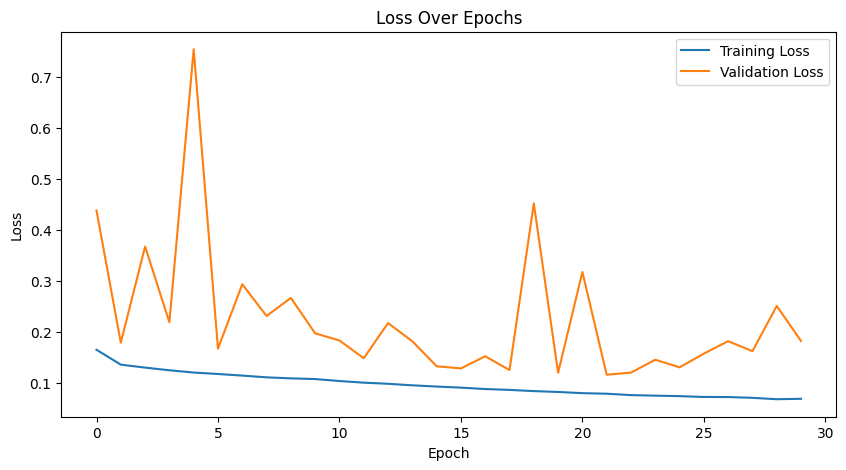

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

input_shape = (250, 250, 3)
num_keypoints = 32
epochs = 40

def learning_rate_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Build the ResNet-50 model using the build_resnet50_keypoint_model function
model = build_resnet50_keypoint_model(input_shape, num_keypoints)

# Compile the model using the MeanSquaredError loss and the custom MeanAveragePrecision metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAveragePrecision()])

# Define the learning rate scheduler
lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Train the model
history = model.fit(train_X, train_keypoint_Y, batch_size=10, epochs=epochs, validation_split=0.2, callbacks=[lr_scheduler])

# Plot loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()


In [ ]:
model = build_resnet50_keypoint_model((250,250,3), 32)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            



```
# This is formatted as code
```

# **Xception**

Epoch 1/20
231/231 [==============================] - ETA: 0s - loss: 0.1477 - mAP: 0.5559

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric MeanAveragePrecision implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


231/231 [==============================] - 21s 53ms/step - loss: 0.1477 - mAP: 0.5559 - val_loss: 0.0887 - val_mAP: 0.5337 - lr: 0.0010
Epoch 2/20
231/231 [==============================] - 9s 37ms/step - loss: 0.0762 - mAP: 0.5642 - val_loss: 0.0775 - val_mAP: 0.5778 - lr: 0.0010
Epoch 3/20
231/231 [==============================] - 9s 37ms/step - loss: 0.0628 - mAP: 0.5654 - val_loss: 0.0769 - val_mAP: 0.5603 - lr: 0.0010
Epoch 4/20
231/231 [==============================] - 9s 37ms/step - loss: 0.0547 - mAP: 0.5622 - val_loss: 0.0735 - val_mAP: 0.5505 - lr: 0.0010
Epoch 5/20
231/231 [==============================] - 9s 37ms/step - loss: 0.0473 - mAP: 0.5603 - val_loss: 0.0728 - val_mAP: 0.5599 - lr: 0.0010
Epoch 6/20
231/231 [==============================] - 9s 37ms/step - loss: 0.0415 - mAP: 0.5579 - val_loss: 0.0757 - val_mAP: 0.5336 - lr: 0.0010
Epoch 7/20
231/231 [==============================] - 9s 37ms/step - loss: 0.0348 - mAP: 0.5554 - val_loss: 0.0745 - val_mAP: 0.5520 -

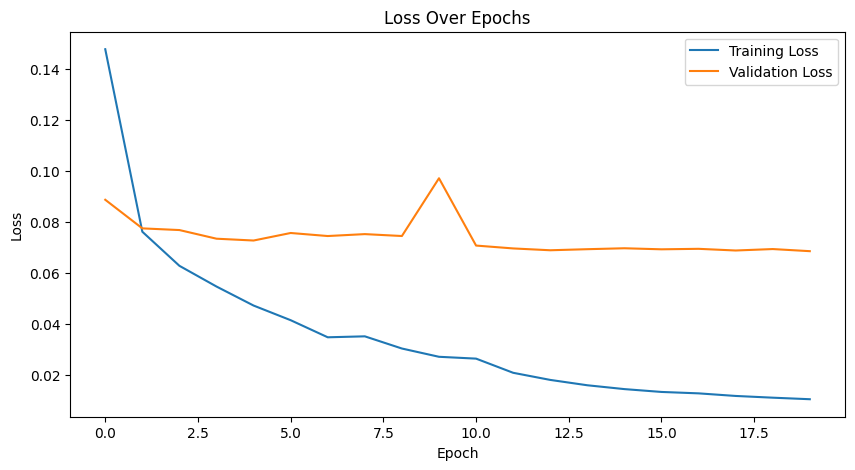

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Conv2D, UpSampling2D, Concatenate, BatchNormalization, Reshape, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Model


def learning_rate_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

base_model = Xception(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
keypoint_output = Dense(32, activation='linear')(x)
modelX = Model(inputs=base_model.input, outputs=keypoint_output)


modelX.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAveragePrecision()])


batch_size = 32
num_epochs = 20


lr_scheduler = LearningRateScheduler(learning_rate_schedule)

m1 = modelX.fit(train_X, train_keypoint_Y, batch_size=batch_size, epochs=num_epochs,
           validation_split=0.2, callbacks=[lr_scheduler])

plt.figure(figsize=(10, 5))
plt.plot(m1.history['loss'], label='Training Loss')
plt.plot(m1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
mAP_metric = MeanAveragePrecision(num_thresholds=11)

for i in range(len(test_X)):
    true_keypoints = test_keypoint_Y[i]
    test_sample = np.expand_dims(test_X[i], axis=0)
    predicted_keypoints = modelX.predict(test_sample)
    predicted_keypoints_reshaped = np.reshape(predicted_keypoints, true_keypoints.shape)
    mAP_metric.update_state(true_keypoints, predicted_keypoints_reshaped)


mean_ap = mAP_metric.result().numpy()
print("Mean Average Precision:", mean_ap)

1/1 [==============================] - 0s 24ms/step
Mean Average Precision: 0.5781977


In [ ]:
modelX.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 124, 124, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Conv2D, UpSampling2D, Concatenate, BatchNormalization, Reshape, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Model


def learning_rate_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

base_model = Xception(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

for layer in base_model.layers:
    layer.trainable = True

x = base_model.output

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
keypoint_output = Dense(32, activation='linear')(x)
modelX = Model(inputs=base_model.input, outputs=keypoint_output)


modelX.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAveragePrecision()])


batch_size = 32
num_epochs = 20


lr_scheduler = LearningRateScheduler(learning_rate_schedule)

m1 = modelX.fit(train_X, train_keypoint_Y, batch_size=batch_size, epochs=num_epochs,
           validation_split=0.2, callbacks=[lr_scheduler])

plt.figure(figsize=(10, 5))
plt.plot(m1.history['loss'], label='Training Loss')
plt.plot(m1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# **EfficientNEt**

16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/20
231/231 [==============================] - 73s 115ms/step - loss: 0.1123 - mAP: 0.5607 - val_loss: 0.1442 - val_mAP: 0.5715 - lr: 0.0010
Epoch 2/20
231/231 [==============================] - 23s 99ms/step - loss: 0.0753 - mAP: 0.5663 - val_loss: 3008.8093 - val_mAP: 0.9906 - lr: 0.0010
Epoch 3/20
231/231 [==============================] - 23s 99ms/step - loss: 0.0607 - mAP: 0.5630 - val_loss: 37977.4805 - val_mAP: 1.0000 - lr: 0.0010
Epoch 4/20
231/231 [==============================] - 23s 98ms/step - loss: 0.0542 - mAP: 0.5644 - val_loss: 0.1995 - val_mAP: 0.4867 - lr: 0.0010
Epoch 5/20
231/231 [==============================] - 23s 99ms/step - loss: 0.0488 - mAP: 0.5618 - val_loss: 0.2229 - val_mAP: 0.6850 - lr: 0.0010
Epoch 6/20
231/231 [==============================] - 23s 98ms/step - loss: 0.0464 - mAP: 0.5579 - val_loss: 0.1848 - val_mAP: 0.6368 - lr: 0.0010
Epoch 7/20
231/231 [=========================

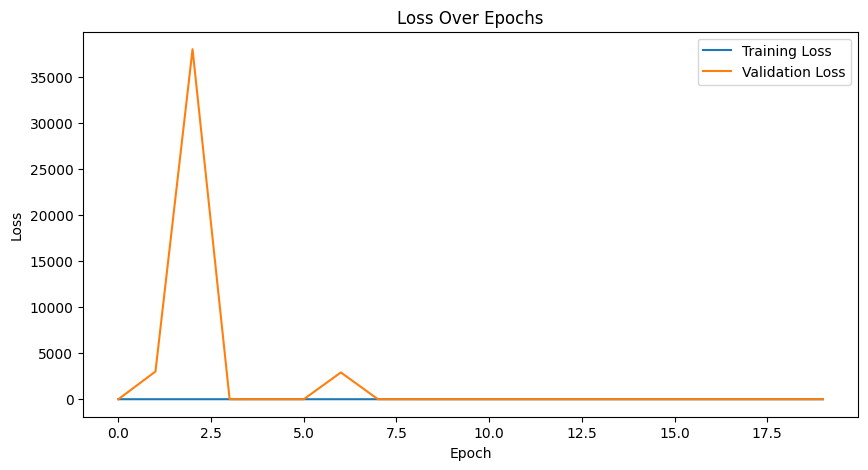

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, UpSampling2D, BatchNormalization, Reshape, Concatenate
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(250, 250, 3))
intermediate_feature_model = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(intermediate_feature_model)
x = Reshape((1, 1, 256))(x)
x = UpSampling2D(size=(16, 16))(x)
x = Conv2D(128, (1, 1), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
outputs = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
outputs = Conv2D(32, (3, 3), activation='linear', padding='same')(outputs)
outputs = GlobalAveragePooling2D()(outputs)
keypoint_model = Model(inputs=base_model.input, outputs=outputs)
keypoint_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAveragePrecision()])

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

m2  = keypoint_model.fit(train_X, train_keypoint_Y, batch_size=32, epochs=20,
           validation_split=0.2, callbacks=[lr_scheduler])

plt.figure(figsize=(10, 5))
plt.plot(m2.history['loss'], label='Training Loss')
plt.plot(m2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
mAP_metric = MeanAveragePrecision(num_thresholds=11)

for i in range(len(test_X)):
    true_keypoints = test_keypoint_Y[i]
    test_sample = np.expand_dims(test_X[i], axis=0)
    predicted_keypoints = keypoint_model.predict(test_sample)
    predicted_keypoints_reshaped = np.reshape(predicted_keypoints, true_keypoints.shape)
    mAP_metric.update_state(true_keypoints, predicted_keypoints_reshaped)


mean_ap = mAP_metric.result().numpy()
print("Mean Average Precision:", mean_ap)

1/1 [==============================] - 0s 27ms/step
Mean Average Precision: 0.54661846


In [ ]:
keypoint_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 250, 250, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 250, 250, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 250, 250, 3)  0           ['normalization[0][0]']    

In [ ]:
test_sample = np.expand_dims(test_X[500], axis=0)
predicted_keypoints = model_V.predict(test_sample)

1/1 [==============================] - 0s 24ms/step


In [ ]:
predicted_keypoints
predicted_keypoints.shape

(1, 32)

In [ ]:
predicted_keypoints

array([[1.0189563 , 1.1874169 , 0.8075593 , 0.95355517, 0.5223893 ,
        0.63116443, 0.5596194 , 0.6320045 , 0.8378763 , 0.9508115 ,
        1.0345405 , 1.183407  , 0.54455507, 0.6342808 , 0.48988003,
        0.36401075, 0.4898417 , 0.33716983, 0.48642182, 0.21277866,
        0.46683806, 0.5294115 , 0.44625884, 0.4893136 , 0.4516965 ,
        0.3579834 , 0.5194787 , 0.36273423, 0.53707325, 0.48611683,
        0.53261817, 0.5322421 ]], dtype=float32)

In [ ]:
test_keypoint_Y.shape
ground_truth_keypoints = test_keypoint_Y[500]
ground_truth_keypoints.shape

(32,)

In [ ]:
ground_truth_keypoints

array([0.37421875, 0.63888889, 0.271875  , 0.72222222, 0.33515625,
       0.48055556, 0.459375  , 0.49027778, 0.42265625, 0.73055556,
       0.40625   , 0.625     , 0.39765625, 0.48611111, 0.41796875,
       0.21666667, 0.4205125 , 0.19457361, 0.44276875, 0.00125972,
       0.33515625, 0.32638889, 0.3046875 , 0.25972222, 0.34296875,
       0.17083333, 0.4921875 , 0.2625    , 0.4515625 , 0.44722222,
       0.4       , 0.42361111])

In [ ]:
predicted_keypoints.shape

(1, 32)

In [ ]:
train_keypoint_Y[100].shape

(32,)

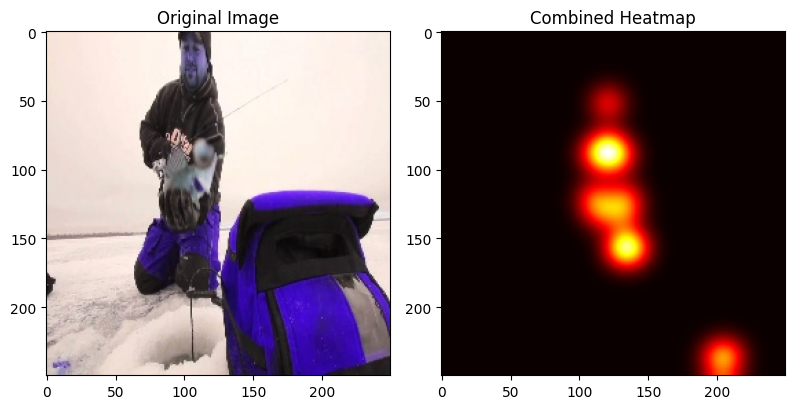

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.patches import Circle

image = test_X[500]

image_height, image_width = 250, 250
num_keypoints = predicted_keypoints.shape[1] // 2

heatmaps = []
for i in range(num_keypoints):
    x_normalized, y_normalized = predicted_keypoints[0, i * 2], predicted_keypoints[0, i * 2 + 1]


    if 0 <= x_normalized <= 1 and 0 <= y_normalized <= 1:
        x = int(x_normalized * (image_width - 1))
        y = int(y_normalized * (image_height - 1))

        heatmap = np.zeros((image_height, image_width))
        heatmap[y, x] = 1
        heatmap = gaussian_filter(heatmap, sigma=10)

        heatmaps.append(heatmap)

# Combine heatmaps into a single array
final_heatmap = np.stack(heatmaps, axis=-1)

# Plot original image and heatmaps
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(final_heatmap.sum(axis=-1), cmap='hot')
plt.title('Combined Heatmap')

# Draw circles on keypoints
for i in range(num_keypoints):
    x_normalized, y_normalized = predicted_keypoints[0, i * 2], predicted_keypoints[0, i * 2 + 1]

    if 0 <= x_normalized <= 1 and 0 <= y_normalized <= 1:
        x = int(x_normalized * (image_width - 1))
        y = int(y_normalized * (image_height - 1))

        # circle = Circle((x, y), radius=5, color='blue', fill=False)
        # plt.gca().add_patch(circle)

plt.tight_layout()
plt.show()


IndexError: ignored